This project aims to predict the weather of Emerald City of with Seathhle weather dataset based on the training we provide to the model created.
We will be using Logistic regression model in this project.

Install relevant libraries in your environment
*** pip install -r requirements.txt *** 



Importing necessary libraries needed for this project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

We start by reading our csv file containing the dataset using pandas

In [2]:
data=pd.read_csv('seattle-weather.csv')
data.head(50)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [3]:
print('This dataset contains',data.shape,'rows and columns respectively')


This dataset contains (1461, 6) rows and columns respectively


We observe that the dataset contains 6 columns, 2 of which have object data type and 4 are float.

The date is having an object(string) data type.

We have no null values in our data

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None


We would convert the date from string to datetime

In [3]:
data['date']= pd.to_datetime(data['date'])

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB
None


Now let's have a look at the statistics of our numeric columns of the data

In [7]:
data.describe()

,date,precipitation,temp_max,temp_min,wind
count,1461,1461.000000,1461.000000,1461.000000,1461.000000
mean,2013-12-31 00:00:00,3.029432,16.439083,8.234771,3.241136
min,2012-01-01 00:00:00,0.000000,-1.600000,-7.100000,0.400000
25%,2012-12-31 00:00:00,0.000000,10.600000,4.400000,2.200000
50%,2013-12-31 00:00:00,0.000000,15.600000,8.300000,3.000000
75%,2014-12-31 00:00:00,2.800000,22.200000,12.200000,4.000000
max,2015-12-31 00:00:00,55.900000,35.600000,18.300000,9.500000
std,NaN,6.680194,7.349758,5.023004,1.437825


We can see interesting statistics for the precipitation column.

The mininum value, first quartile and median are recorded to be 0.00.

Having the first quartile to be 0.00 indicates that 25% of the data in this column is less than or equal to 0.00. 

The median is the midpoint of the data distribution that separates the higher half from the lower half of the precipitation values in the dataset. 

In this case it is also 0.00 units.

VISUALIZATION

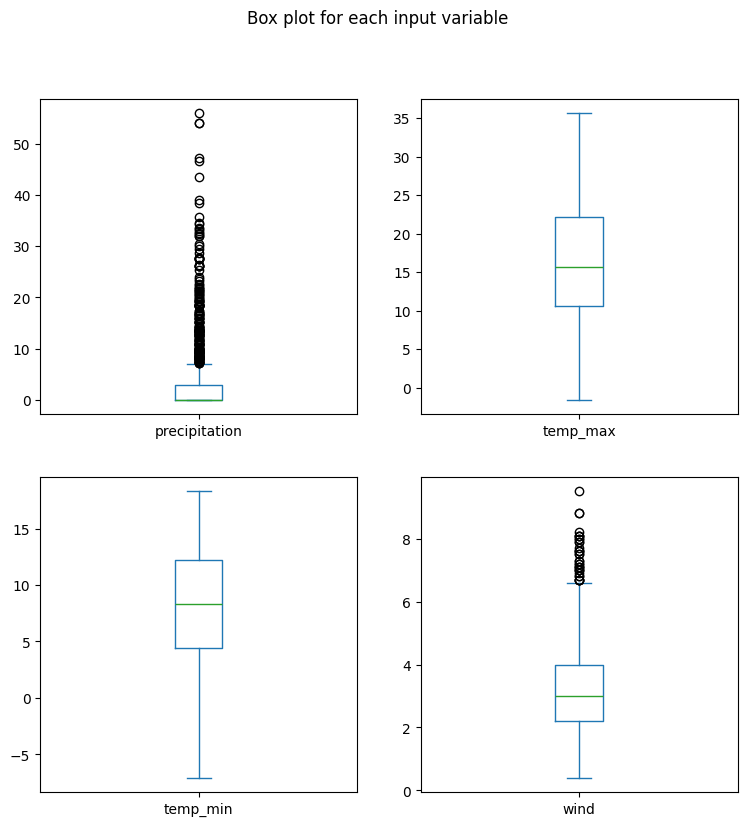

In [8]:
data.drop('weather', axis=1).plot(kind='box',subplots=True,layout=(2,2),sharex=False, sharey=False, figsize=(9,9),title='Box plot for each input variable')
plt.show()

The box plots above is very useful for identifying outliers. 

Data points that fall above or below the upper and lower whiskers respectively are considered outliers.

From the box plots above we observe that precipitation and wind have outliers above the maximum points.

These outliers could be as a result of the following: 

Extreme weather events, seasonal variability, geographic factors, measurement height or measurement errors.



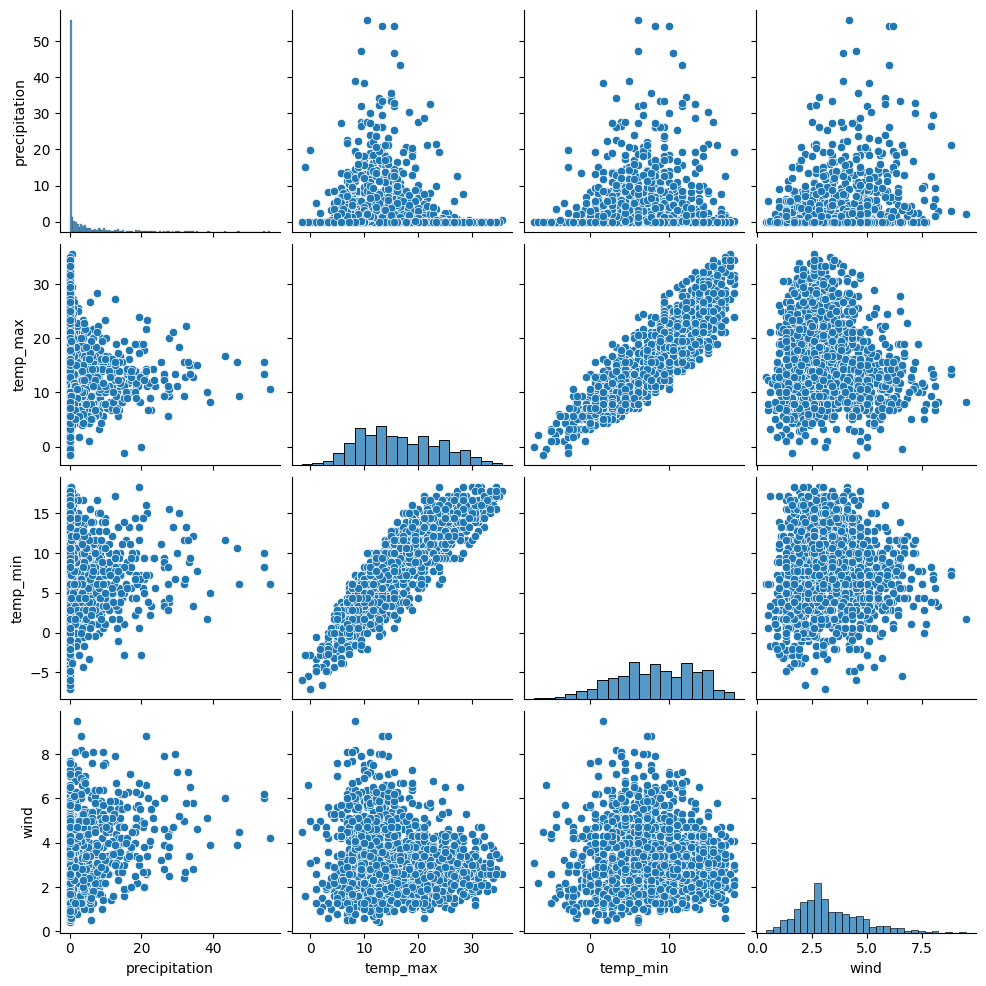

In [9]:
df=data.drop('weather',axis=1)
sns.pairplot(df)

From the scatter plot matrix above, it is evident that wind, precipitation, and both minimum and maximum temperatures are not correlated, with the exception of the minimum temperature, which exhibits a positive relationship with the maximum temperature.

This observation aligns with the findings in the correlation matrix.

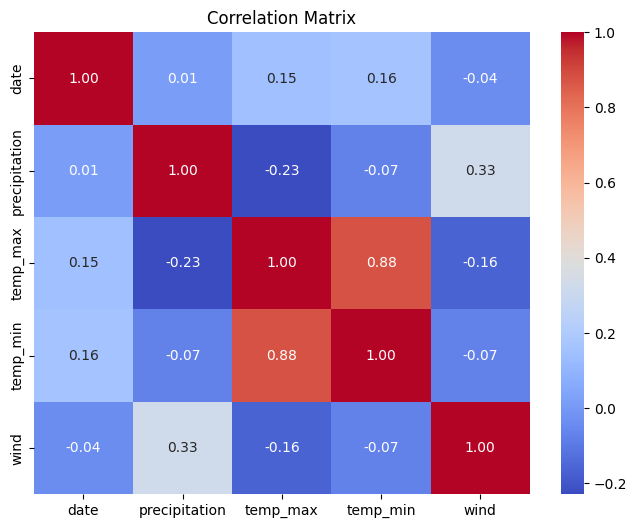

In [10]:
correlation_matrix=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Line Plot

We want to visualize the precipitation data in a line plot over time.

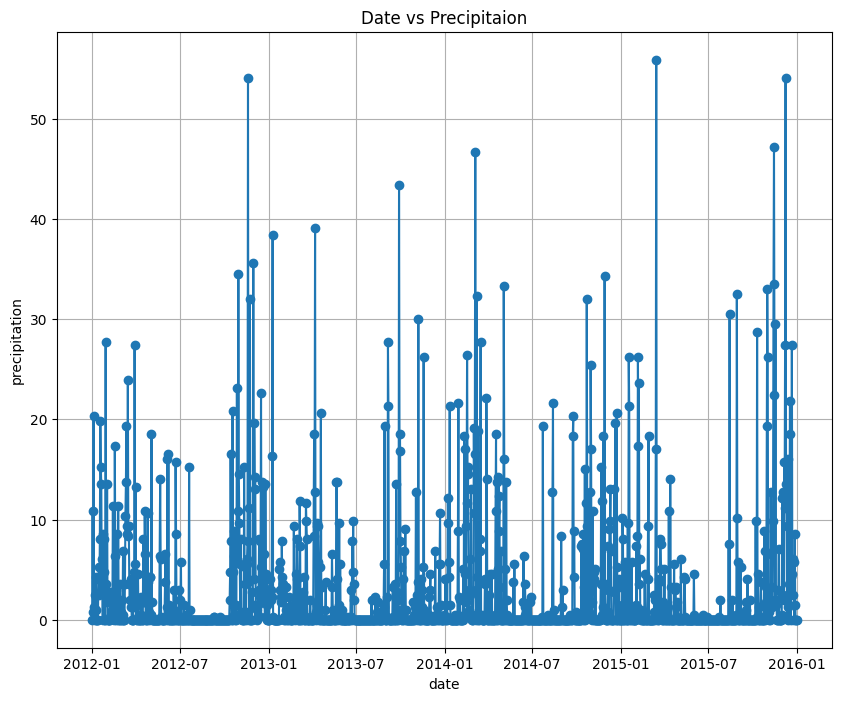

In [11]:
# Plot date against precipitation using line plot
plt.figure(figsize=(10,8))
plt.plot(data['date'],data['precipitation'],marker='o',linestyle='-')
plt.title('Date vs Precipitaion')
plt.xlabel('date')
plt.ylabel('precipitation')
plt.grid(True)
plt.show()

The line plot above is so condensed because the date ranges from 1st of January, 2012 to 31st of December, 2015 which make it difficult to visualize.

We calculate the mean precipitation for each month of the year across 2012 - 2015 so that we can easily visualize to make our analysis.

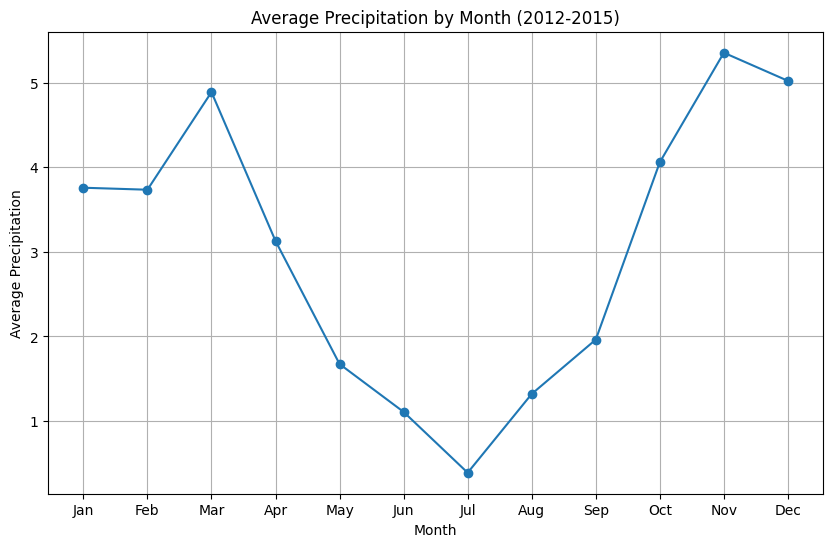

In [12]:
# Extract month from the 'date' column
df['month'] = df['date'].dt.month

# Calculate the mean precipitation for each month
monthly_precipitation = df.groupby('month')['precipitation'].mean()

# Plot months against average precipitation using a line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_precipitation.index, monthly_precipitation.values, marker='o', linestyle='-')
plt.title('Average Precipitation by Month (2012-2015)')
plt.xlabel('Month')
plt.ylabel('Average Precipitation')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

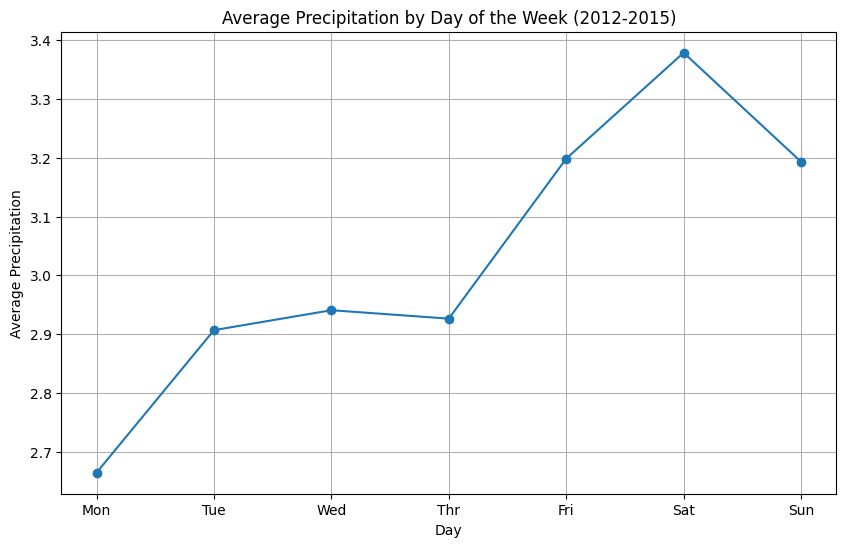

In [13]:
# Extract weekday from the 'date' column
df['weekday'] = df['date'].dt.weekday

# Calculate the mean precipitation for each day of the week
monthly_precipitation = df.groupby('weekday')['precipitation'].mean()

# Plot months against average precipitation using a line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_precipitation.index, monthly_precipitation.values, marker='o', linestyle='-')
plt.title('Average Precipitation by Day of the Week (2012-2015)')
plt.xlabel('Day')
plt.ylabel('Average Precipitation')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

Let's take a look at how the paramenters varies with the weather


First let's compare the variations in temperature with the various weather types.

We can see from the visual below that averagely temperature is higher on sunny day and lowest on snowy days.

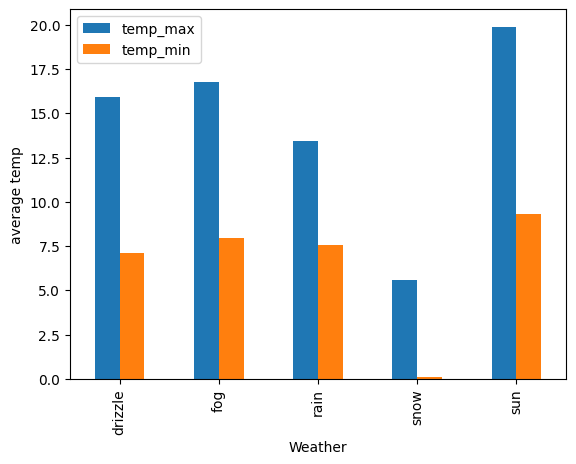

In [17]:
average_temperature_by_weather=data.groupby('weather')[['temp_max','temp_min']].mean()
average_temperature_by_weather.plot(kind='bar')
plt.xlabel('Weather')
plt.ylabel('average temp')
plt.show()

The bar chart clearly illustrates that precipitation occurs exclusively during rainy and snowy days, as there are no records of precipitation for other weather types.

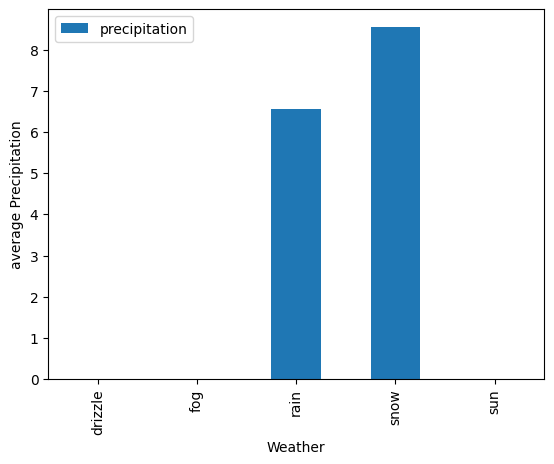

In [19]:
average_prep_by_weather=data.groupby('weather')[['precipitation']].mean()
average_prep_by_weather.plot(kind='bar')
plt.xlabel('Weather')
plt.ylabel('average Precipitation')
plt.show()

Upon comparing the average wind speed across different weather types, it becomes apparent that snow exhibited the highest wind speed throughout the recorded period, followed by rain and sun.

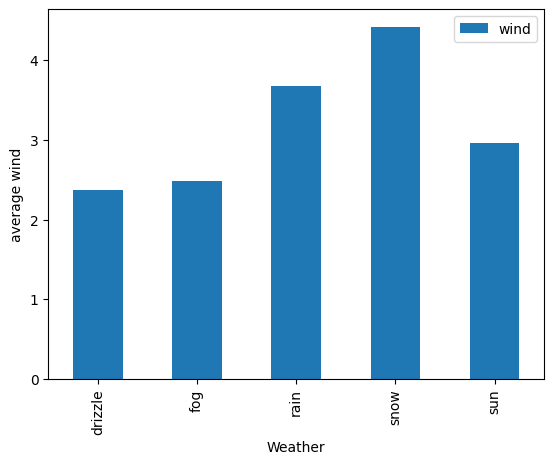

In [20]:
average_wind_by_weather=data.groupby('weather')[['wind']].mean()
average_wind_by_weather.plot(kind='bar')
plt.xlabel('Weather')
plt.ylabel('average wind')
plt.show()

Splitting our data into train and test values 

In [9]:
head=['precipitation',	'temp_max',	'temp_min',	'wind']
X=data[head]
Y=data['weather']

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

Creating our model and training using Logistic Regression from Sklearn

In [11]:
model=LogisticRegression()
model.fit(X_train,Y_train)

c:\Users\nsiah\OneDrive\Documents\Weather Prediction\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

We can also observe how the average precipitation varies across the days of the week during this period.

Precipitation appears to be higher on Saturdays and in November of every year, and lowest on Mondays and in July during the period